# AI Studio 2025 - main notebook

You should have a file from PPFA named "credential.json". Put in the directory where you're running this project, and then run the next cell of this document!

Note that unless you get instructions from your Challenge Advisors, you shouldn't ever need to change the code in this next cell.

In [1]:
!cd config && uv add nltk
!cd config && uv add seaborn
!cd config && uv add spacy
!cd config && uv add torch transformers
!cd config && uv add wordcloud
!cd config && uv add xgboost

Resolved 204 packages in 10ms
Bytecode compiled 17298 files in 1.23s
Resolved 204 packages in 0.81ms
Bytecode compiled 17298 files in 323ms
Resolved 204 packages in 0.88ms
Bytecode compiled 17298 files in 318ms
Resolved 204 packages in 0.89ms
Bytecode compiled 17298 files in 335ms
Resolved 204 packages in 0.67ms
Bytecode compiled 17298 files in 328ms
Resolved 204 packages in 0.90ms
Bytecode compiled 17298 files in 335ms


In [2]:
# Standard library
import re
from collections import Counter

# Third-party libraries
import gensim
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
from PIL import Image
import seaborn as sns
import spacy
import torch
from wordcloud import WordCloud
#from xgboost import XGBClassifier

# For the word2vec transformer:
from sklearn.base import BaseEstimator, TransformerMixin

# NLTK downloads
nltk.download('wordnet')

# NLTK submodules
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

# Scikit-learn
from sklearn.ensemble import (
    HistGradientBoostingClassifier,
    RandomForestClassifier
)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    ConfusionMatrixDisplay,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
    roc_auc_score,
)
from sklearn.model_selection import (
    cross_val_score,
    GridSearchCV,
    StratifiedKFold,
    train_test_split
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    label_binarize,
    LabelEncoder
)
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from google.oauth2 import service_account
import pandas_gbq
import pandas as pd

credentials = service_account.Credentials.from_service_account_file(
    "./credential.json",
    scopes=["https://www.googleapis.com/auth/cloud-platform"],
)
pandas_gbq.context.credentials = credentials
pandas_gbq.context.project = "roo-ds"

raw_df = pandas_gbq.read_gbq("SELECT * FROM roo-ds.ai_studio_2025.labeled_conversations")
raw_df

Downloading: 100%|██████████|


,Genesys_interaction_id,Full_conversation,First_prompt,First_response,Interaction_contains_PII,First_label,Flag_label_for_review,Comment,Provided_prompt,Provided_prompt_autocalculated,Labeller,Reviewer_suggested_label,Reviewer,Reviewer_comment,Ease_of_use,Helpfulness,Understanding,Recommendation
0,1291f093-33bb-48b3-824b-59a10b77ae31,"[{""text"":""Hey there, I'm Roo! You can ask me q...",how long does it take to ejaculate when i mast...,\n\nEjaculation (aka cumming) typically starts...,False,FP,True,None,False,False,Karen,FP,Michael,None,<NA>,<NA>,<NA>,<NA>
1,fbf1bebc-8f51-43a9-8554-58fe3a63cfaf,"[{""text"":""Hey there, I'm Roo! You can ask me q...",What types of kisse are there and how to do it...,"\n\nI'm a robot, so I can't really explain the...",False,TP,False,None,False,False,Karen,None,None,None,<NA>,<NA>,<NA>,<NA>
2,52e96081-9f3a-411d-b7c5-ff5f9f6028e2,"[{""text"":""Hey there, I'm Roo! You can ask me q...",I’m spotting pink,\n\nSpotting is completely normal and can happ...,False,TP,False,None,False,False,Karen,None,None,None,<NA>,<NA>,<NA>,<NA>
3,55f178cf-8b7b-451d-98a6-0d38097c7b16,"[{""text"":""Hey there, I'm Roo! You can ask me q...",I am having brown discharge but idk if it’s sp...,\n\nSpotting is completely normal and can happ...,False,FP,True,None,False,False,Karen,FP,Michael,None,<NA>,<NA>,<NA>,<NA>
4,748f6a7f-38b0-414c-842c-da27ab370360,"[{""text"":""Hey there, I'm Roo! You can ask me q...",I had my regular cycle for a week and now have...,\n\nSpotting is completely normal and can happ...,False,TP,False,None,False,False,Karen,None,None,None,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2081,caa41186-0787-4cd6-bb6a-8494b678ecb7,"[{""text"":""Hey there, I'm Roo! You can ask me q...",Does Planned Parenthood offer pap smears?,Yes. Planned Parenthood health centers offer P...,False,TP,False,None,False,False,Karen,None,None,None,<NA>,<NA>,<NA>,<NA>
2082,caa41186-0787-4cd6-bb6a-8494b678ecb7,"[{""text"":""Hey there, I'm Roo! You can ask me q...",Does Planned Parenthood offer pap smears?,Yes. Planned Parenthood health centers offer P...,False,TP,False,None,False,False,Karen,None,None,None,<NA>,<NA>,<NA>,<NA>
2083,ddf7406f-e3ab-4896-b4cf-6a71f20c446d,"[{""text"":""Hey there, I'm Roo! You can ask me q...",Does planned parenthood Eugene offer walk in s...,Yes. Planned Parenthood health centers offer P...,False,TP,True,In general we offer it but they talk about spe...,False,False,Karen,None,None,None,<NA>,<NA>,<NA>,<NA>
2084,ddf7406f-e3ab-4896-b4cf-6a71f20c446d,"[{""text"":""Hey there, I'm Roo! You can ask me q...",Does planned parenthood Eugene offer walk in s...,Yes. Planned Parenthood health centers offer P...,False,TP,True,In general we offer it but they talk about spe...,False,False,Karen,None,None,None,<NA>,<NA>,<NA>,<NA>


Now you have a pandas DataFrame called `df` and you can use that in the rest of this project!

# Data Exploration

In [39]:
# Exploring the data and columns.
print(raw_df.columns)
print()
print(f"Shape: {raw_df.shape}")

Index(['Genesys_interaction_id', 'Full_conversation', 'First_prompt',
       'First_response', 'Interaction_contains_PII', 'First_label',
       'Flag_label_for_review', 'Comment', 'Provided_prompt',
       'Provided_prompt_autocalculated', 'Labeller',
       'Reviewer_suggested_label', 'Reviewer', 'Reviewer_comment',
       'Ease_of_use', 'Helpfulness', 'Understanding', 'Recommendation'],
      dtype='object')

Shape: (2086, 18)


In [40]:
# Exploring the data, seeing the different questions, responses, and labels. 

for i in range(0,20):
    print(raw_df.loc[[i], ['First_prompt']].to_string())
    print(raw_df.loc[[i], ['First_response']].to_string())
    print()
    print()

                                           First_prompt
0  how long does it take to ejaculate when i masturbate
                                                                                                                                              First_response
0  \n\nEjaculation (aka cumming) typically starts during puberty (age 12-15), but it can start a few years before or after that. Everyone’s a bit different!


                                                  First_prompt
1  What types of kisse are there and how to do it step by step
                                                                                                                                                                                                                                                                             First_response
1  \n\nI'm a robot, so I can't really explain the mechanics of kissing. But I do know that this is a super common concern, and there's no \*right\* way to kiss. T

In [41]:
# Exploring the data: 
    # Notice that we have a large class imbalance. 
        # A LOT more TP and FP compared to TN and FN. 
    # None of the First_prompt, First_response, or First_label columns have any null values, which is good. 

print(f"All categories: {pd.unique(raw_df['First_label'])}\n")


label_counts = raw_df['First_label'].value_counts()
print(f"Number of records per label: {label_counts}\n")


null_count = raw_df.isnull().sum()
print(null_count)

All categories: ['FP' 'TP' 'TN' 'FN']

Number of records per label: First_label
TP    1145
FP     806
TN      71
FN      64
Name: count, dtype: int64

Genesys_interaction_id               0
Full_conversation                    0
First_prompt                         0
First_response                       0
Interaction_contains_PII             0
First_label                          0
Flag_label_for_review                0
Comment                           1790
Provided_prompt                      0
Provided_prompt_autocalculated       0
Labeller                             0
Reviewer_suggested_label          2042
Reviewer                          2042
Reviewer_comment                  2074
Ease_of_use                       2086
Helpfulness                       2086
Understanding                     2086
Recommendation                    2086
dtype: int64


/tmp/ipykernel_61/2715069432.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette=['green', 'red', 'blue', 'orange'])


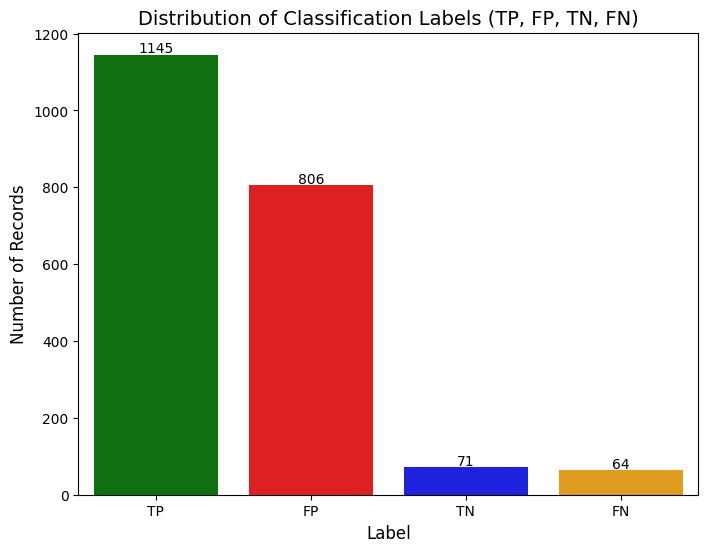

In [42]:
df_confusion = raw_df[['First_prompt', 'First_response', 'First_label']]

# Count records per category in First_label
counts = df_confusion['First_label'].value_counts()

# Plot histogram (bar plot for categorical data)
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts.values, palette=['green', 'red', 'blue', 'orange'])

# Titles and labels
plt.title("Distribution of Classification Labels (TP, FP, TN, FN)", fontsize=14)
plt.xlabel("Label", fontsize=12)
plt.ylabel("Number of Records", fontsize=12)

# Annotate counts on bars
for i, v in enumerate(counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontsize=10)

plt.show()

## Wordclouds

In [43]:
# Setting up the data for word clouds. (FUNCTIONS ARE DEFINED IN THE SECTION BELOW)

# Create DF
wc_df = data_setup()

# Tokenize the columns - from this point forward we will work with a list of tokens
tokenize_text(wc_df)

# Remove stopwords - the default is to use the nltk library, but can change this by specifying the lib_name parameter
remove_stopwords(wc_df)

# Using lemmatization, but there is an option to use stemming here 
nltk_WordNetLemmatizer(wc_df)
# nltk_PorterStemmer(df)

# Now that all the token processing is done, we want to join the tokens back into sentances for training
join_text(wc_df)

# This is optional, but we are starting off using prompt/response info to train
concatenate_prompt_and_response(wc_df)

df_tp, df_tn, df_fp, df_fn = separate_df_by_label(wc_df)

# Testing what the final result of our data processing was
wc_df['prompt_and_response'][0]

Dataframe columns: Index(['cleaned_prompt', 'cleaned_response', 'First_label'], dtype='object')
Testing lemmatization:  ['ejaculation', 'aka', 'cumming', 'typically', 'start', 'puberty', 'age', '1215', 'start', 'year', 'everyones', 'bit', 'different']
(1145, 4)
(71, 4)
(806, 4)
(64, 4)
long take ejaculate masturbate ejaculation aka cumming typically start puberty age 1215 start year everyones bit different


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'long take ejaculate masturbate ejaculation aka cumming typically start puberty age 1215 start year everyones bit different'

### Wordclouds for Prompt

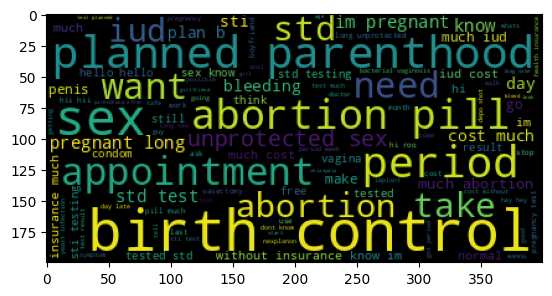

In [44]:
# Word clouds for all labels
meta_text = " ".join(wc_df["cleaned_prompt"].astype(str))
wc = WordCloud().generate(meta_text)
plt.imshow(wc)

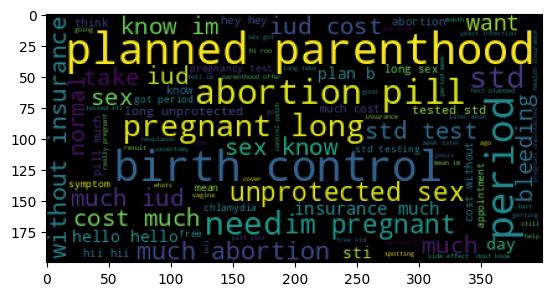

In [45]:
# Word cloud for all TP labels. 
meta_text = " ".join(df_tp['cleaned_prompt'].astype(str))
wc = WordCloud().generate(meta_text)
plt.imshow(wc)

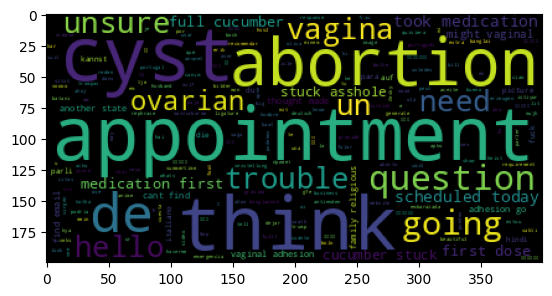

In [46]:
# Word cloud for all TN labels. 
meta_text = " ".join(df_tn['cleaned_prompt'].astype(str))
wc = WordCloud().generate(meta_text)
plt.imshow(wc)

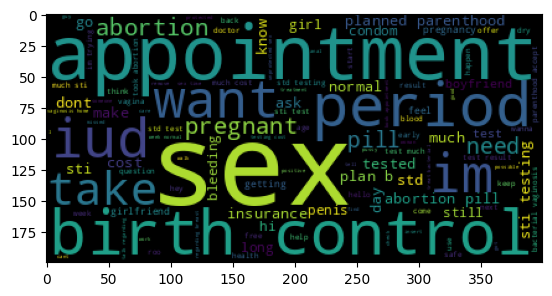

In [47]:
# Word cloud for all FP labels. 
meta_text = " ".join(df_fp['cleaned_prompt'].astype(str))
wc = WordCloud().generate(meta_text)
plt.imshow(wc)

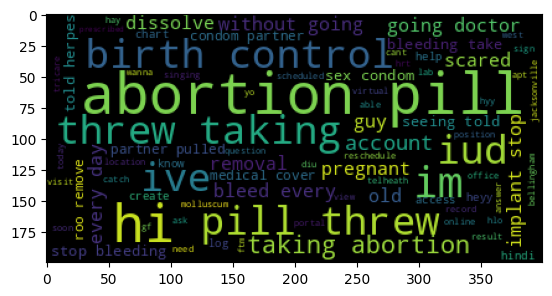

In [48]:
# Word cloud for all FN labels. 
meta_text = " ".join(df_fn['cleaned_prompt'].astype(str))
wc = WordCloud().generate(meta_text)
plt.imshow(wc)

### Wordclouds for Prompt and Response

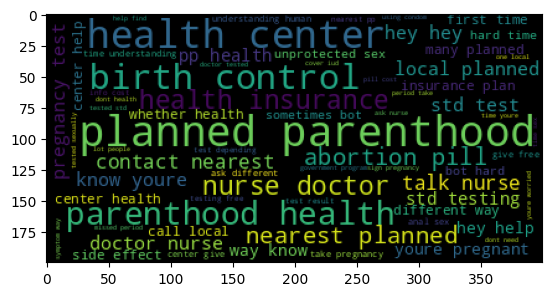

In [49]:
# Word cloud for all labels
meta_text = " ".join(wc_df["prompt_and_response"].astype(str))
wc = WordCloud().generate(meta_text)
plt.imshow(wc)

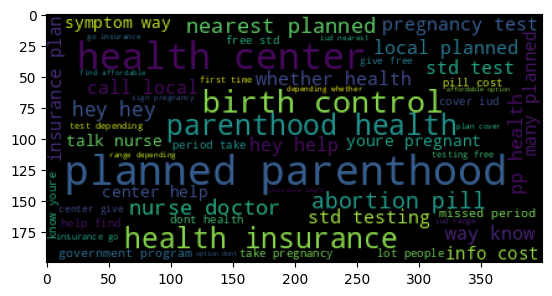

In [50]:
# Word cloud for all TP labels. 
meta_text = " ".join(df_tp['prompt_and_response'].astype(str))
wc = WordCloud().generate(meta_text)
plt.imshow(wc)

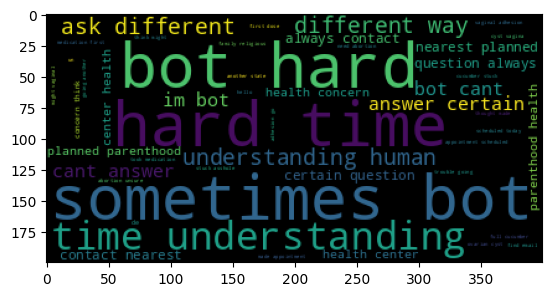

In [51]:
# Word cloud for all TN labels. 
meta_text = " ".join(df_tn['prompt_and_response'].astype(str))
wc = WordCloud().generate(meta_text)
plt.imshow(wc)

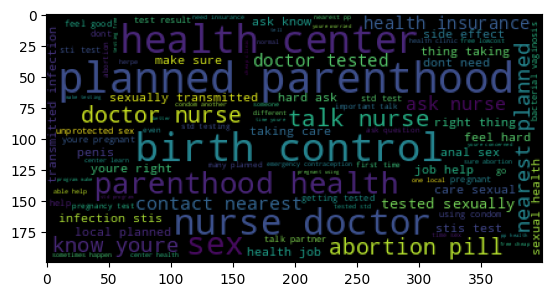

In [52]:
# Word cloud for all FP labels. 
meta_text = " ".join(df_fp['prompt_and_response'].astype(str))
wc = WordCloud().generate(meta_text)
plt.imshow(wc)

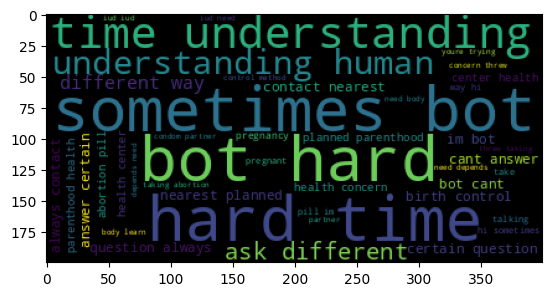

In [53]:
# Word cloud for all FN labels. 
meta_text = " ".join(df_fn['prompt_and_response'].astype(str))
wc = WordCloud().generate(meta_text)
plt.imshow(wc)

## Word Frequency

In [54]:
all_words = " ".join(wc_df["prompt_and_response"]).split()
word_freq = Counter(all_words).most_common(20)
print("Top 20 words:", word_freq)

Top 20 words: [('get', 1166), ('health', 1101), ('sex', 822), ('planned', 753), ('parenthood', 721), ('center', 596), ('help', 584), ('std', 573), ('insurance', 547), ('abortion', 537), ('period', 530), ('like', 491), ('youre', 491), ('doctor', 486), ('pregnancy', 484), ('test', 483), ('birth', 465), ('control', 464), ('cost', 412), ('iud', 409)]


# Data Preprocessing

## Preprocessing methods

In [55]:
# Extract the prompt, response, and label columns. 
# Make everything lowercase. 
# Remove punctuation. 

def data_setup():
    # EXPLANATION: WE NEED TO MAKE A COPY OF THE DF WITH THE DESIRED ROWS BECAUSE W/O THE COPY, PYTHON DOESN'T KNOW IF
    # DF IS A VIEW OR A COPY WHICH IS WHAT CAUSED THE SETTINGWITHCOPY WARNINGS
    df = raw_df[['First_prompt', 'First_response', 'First_label']].copy()
    
    df.rename(columns={"First_prompt": "cleaned_prompt", "First_response": "cleaned_response"}, inplace=True)
    
    # Make everything lowercase
    df.loc[:,'cleaned_prompt'] = df['cleaned_prompt'].str.lower()
    df.loc[:,'cleaned_response'] = df['cleaned_response'].str.lower()
    
    # Remove punctuation
    df.loc[:,'cleaned_prompt'] = df['cleaned_prompt'].str.replace(r'[^\w\s]', '', regex=True)
    df.loc[:,'cleaned_response'] = df['cleaned_response'].str.replace(r'[^\w\s]', '', regex=True)

    print(f"Dataframe columns: {df.columns}")

    return df

In [56]:
def data_setup_gbdt():
    # Data setup
    df = raw_df[['First_prompt', 'First_response', 'First_label']]
    
    # Copy the columns
    df.loc[:, 'cleaned_prompt'] = df['First_prompt']
    df.loc[:, 'cleaned_response'] = df['First_response']
    
    # Make everything lowercase
    df.loc[:,'cleaned_prompt'] = df['cleaned_prompt'].str.lower()
    df.loc[:,'cleaned_response'] = df['cleaned_response'].str.lower()
    
    # Remove punctuation
    df.loc[:,'cleaned_prompt'] = df['cleaned_prompt'].str.replace(r'[^\w\s]', '', regex=True)
    df.loc[:,'cleaned_response'] = df['cleaned_response'].str.replace(r'[^\w\s]', '', regex=True)

    label_map = {
        "TP": 0,
        "FP": 1,
        "TN": 2,
        "FN": 3
    }
    df["label_num"] = df["First_label"].map(label_map)
    
    print(f"Dataframe columns: {df.columns}")

    return df

In [57]:
# Spliting/tokenizing 
# Split the prompts/responses into a list of words
def tokenize_text(df):
    df.loc[:,'cleaned_prompt'] = df['cleaned_prompt'].str.split()
    df.loc[:,"cleaned_response"] = df["cleaned_response"].str.split()

    return df

# Join the text back into a string
def join_text(df):
    df.loc[:,'cleaned_prompt'] = df['cleaned_prompt'].apply(lambda x: " ".join([word for word in x]))
    df.loc[:,'cleaned_response'] = df['cleaned_response'].apply(lambda x: " ".join([word for word in x]))

    return df
    

In [58]:
# lib_name: Name of the stopword library. Ex: nltk, spacey

def remove_stopwords(df, lib_name: str="nltk"):
    if lib_name == "nltk":
        nltk.download('stopwords')
        stop_words = set(stopwords.words('english'))
        
        df.loc[:,'cleaned_prompt'] = df['cleaned_prompt'].apply(lambda x: [word for word in x if word not in stop_words])
        df.loc[:,'cleaned_response'] = df['cleaned_response'].apply(lambda x: [word for word in x if word not in stop_words])

    return df

In [59]:
# Lemmatization 

def nltk_WordNetLemmatizer(df):
    lemmatizer = WordNetLemmatizer()
    df.loc[:,'cleaned_prompt'] = df['cleaned_prompt'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    df.loc[:,'cleaned_response'] = df['cleaned_response'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
    
    # Test
    print("Testing lemmatization: ", df['cleaned_response'][0])

    return df

def lemmatize(sentence):
    doc = nlp(sentence)
    return " ".join([token.lemma_.lower() for token in doc])

def spacy_lemmatize(df):
    nlp = spacy.load("en_core_web_sm")
    df["cleaned_prompt"] = df["cleaned_prompt"].apply(lemmatize)
    df["cleaned_response"] = df["cleaned_response"].apply(lemmatize)

    print(df['cleaned_prompt'][2])
    print(df['cleaned_response'][2])

    return df

In [60]:
# Porter Stemming

def nltk_PorterStemmer(df):
    stemmer = PorterStemmer()
    df.loc[:,'cleaned_prompt'] = df['cleaned_prompt'].apply(lambda x: [stemmer.stem(word) for word in x])
    df.loc[:,'cleaned_response'] = df['cleaned_response'].apply(lambda x: [stemmer.stem(word) for word in x])
    
    # Test
    print("Test porter stemmer: ", df['cleaned_response'][0])

    return df


# Snowball Stemming

def nltk_SnowballStemmer(df):
    stemmer = SnowballStemmer("english")
    df.loc[:,'cleaned_prompt'] = df['cleaned_prompt'].apply(lambda x: [stemmer.stem(word) for word in x])
    df.loc[:,'cleaned_response'] = df['cleaned_response'].apply(lambda x: [stemmer.stem(word) for word in x])
    
    # Test
    print("Test snowball stemmer: ", df['cleaned_response'][0])

    return df

In [61]:
# Check results of cleaning the data. 
def print_x_rows(df, x: int):
    for i in range(x):
        print(df['cleaned_prompt'][i])
        print(df['cleaned_response'][i])

    return df

In [62]:
def concatenate_prompt_and_response(df):
    # Create a new column with the prompt and responses concatenated.
    df['prompt_and_response'] = df['cleaned_prompt'] + " " + df['cleaned_response']

    return df


def separate_df_by_label(df):
    # Separate the df based on the label. 
    df_tp = df[df['First_label'] == 'TP']
    df_tn = df[df['First_label'] == 'TN']
    df_fp = df[df['First_label'] == 'FP']
    df_fn = df[df['First_label'] == 'FN']
    
    print(df_tp.shape)
    print(df_tn.shape)
    print(df_fp.shape)
    print(df_fn.shape)
    print(df['prompt_and_response'][0])

    return df_tp, df_tn, df_fp, df_fn

### word2vec

In [63]:
class Word2Vec_Transformer(BaseEstimator, TransformerMixin): 
    
    def __init__(self, vector_size, window, min_count, sg):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.sg = sg

    
    def fit(self, X, y=None):
        
        self.sentences = [sentence for sentence in X]
        
        self.model = Word2Vec(sentences = self.sentences, vector_size = self.vector_size,
                              window = self.window, min_count = self.min_count, sg = self.sg)

        return self

    
    def transform(self, X): 

        all_vectors = []
    
        for sentence in X: 

            # Vectorization: 
            # Get the tokens that are known to Word2Vec. 
            known_tokens = [word for word in sentence if word in self.model.wv]

            # If there are no known tokens return something empty. 
            if len(known_tokens) == 0:
                result = np.zeros(self.vector_size)

            else: 
                # Else average the vectors of all of the tokens. 
                result = self.model.wv.get_mean_vector(known_tokens)

            all_vectors.append(result)
            

        return np.array(all_vectors)

## Preprocessing pipeline

In [64]:
# Create DF
df = data_setup()

# Tokenize the columns - from this point forward we will work with a list of tokens
tokenize_text(df)

# Remove stopwords - the default is to use the nltk library, but can change this by specifying the lib_name parameter
remove_stopwords(df)

# Using lemmatization, but there is an option to use stemming here 
nltk_WordNetLemmatizer(df)
# nltk_PorterStemmer(df)

# Now that all the token processing is done, we want to join the tokens back into sentances for training
join_text(df)

# This is optional, but we are starting off using prompt/response info to train
concatenate_prompt_and_response(df)

# Testing what the final result of our data processing was
df['prompt_and_response'][0]

Dataframe columns: Index(['cleaned_prompt', 'cleaned_response', 'First_label'], dtype='object')
Testing lemmatization:  ['ejaculation', 'aka', 'cumming', 'typically', 'start', 'puberty', 'age', '1215', 'start', 'year', 'everyones', 'bit', 'different']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'long take ejaculate masturbate ejaculation aka cumming typically start puberty age 1215 start year everyones bit different'

# Modeling

## Experiment Functions & Wrappers

In [65]:
# Features and labels
X = df["prompt_and_response"]
y = df["First_label"]                

# Train-test split (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [66]:
def plot_metrics(accuracy, precision, recall, f1, auc, title="Model Performance"):
    """
    Visualize classification metrics in a bar chart.
    """
    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "AUC": auc
    }

    plt.figure(figsize=(7, 6))
    plt.bar(metrics.keys(), metrics.values())
    plt.ylim(0, 1)  # because all metrics are between 0 and 1
    plt.title(title, fontsize=14, pad=20)
    plt.ylabel("Score")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    
    # add values above bars
    for i, (k, v) in enumerate(metrics.items()):
        plt.text(i, v + 0.02, f"{v:.2f}", ha="center", fontsize=10)

    plt.show()

In [67]:
def plot_experiments(labels, validation_metrics, training_metrics, title="Model Performance"):
    """
    Plots one graph per metric, comparing training and validation performance.

    Args:
        labels (list): Names of each experiment (x-axis labels)
        validation_metrics (dict): Dict of validation metrics, e.g. {"Accuracy": [...], "Precision": [...], ...}
        training_metrics (dict): Dict of training metrics, same keys as validation_metrics
        title (str): Overall plot title
    """
    # Generated by ChatGPT
    
    metrics = list(validation_metrics.keys())
    num_metrics = len(metrics)

    plt.figure(figsize=(16, 4 * num_metrics))
    x = range(1, len(labels) + 1)

    for i, metric in enumerate(metrics, 1):
        plt.subplot(num_metrics, 1, i)
        plt.plot(x, validation_metrics[metric], marker='o', label=f'Validation {metric}', linewidth=2)
        plt.plot(x, training_metrics[metric], marker='s', label=f'Training {metric}', linewidth=2, linestyle='--')

        # Add value labels
        for j, v in enumerate(validation_metrics[metric]):
            plt.text(j + 1, v + 0.01, f"{v:.2f}", ha='center', fontsize=8, color='blue')
        for j, v in enumerate(training_metrics[metric]):
            plt.text(j + 1, v - 0.05, f"{v:.2f}", ha='center', fontsize=8, color='orange')

        plt.ylim(0, 1)
        plt.xticks(x, labels)
        plt.xlabel("Experiment")
        plt.ylabel(metric)
        plt.title(f"{title}:{metric}", fontsize=12)
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.legend()

    plt.suptitle(title, fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()


In [68]:
def plot_full_experiment(
    labels,
    validation_metrics,
    training_metrics,
    validation_report_metrics,
    title="Model Performance Overview"
):
    # Generated by ChatGPT
    """
    Plots 8 subplots:
      1–5: Overall metrics (validation vs training)
      6–8: Per-class metrics (precision, recall, f1) for FN, FP, TN, TP

    Args:
        labels (list): Experiment names (x-axis labels)
        validation_metrics (dict): Validation averages, keys: accuracy, precision, recall, f1, auc
        training_metrics (dict): Training averages, same keys as validation_metrics
        validation_report_metrics (dict): Per-class metrics, structure:
            {
              "precision": {"FN": [], "FP": [], "TN": [], "TP": []},
              "recall":    {"FN": [], "FP": [], "TN": [], "TP": []},
              "f1":        {"FN": [], "FP": [], "TN": [], "TP": []}
            }
        title (str): Overall plot title
    """
    x = np.arange(1, len(labels) + 1)
    plt.figure(figsize=(18, 28))  # Large figure

    # Define metric order for consistency
    overall_metrics = ["accuracy", "precision", "recall", "f1", "auc"]
    per_class_metrics = ["precision", "recall", "f1"]

    # --- Subplots 1–5: Overall validation vs training metrics ---
    for i, metric in enumerate(overall_metrics, start=1):
        plt.subplot(8, 1, i)
        plt.plot(x, validation_metrics[metric], marker='o', linewidth=2, label=f'Validation {metric.capitalize()}')
        plt.plot(x, training_metrics[metric], marker='s', linestyle='--', linewidth=2, label=f'Training {metric.capitalize()}')

        plt.title(f"{metric.capitalize()} (Validation vs Training)", fontsize=14)
        plt.xlabel("Experiment")
        plt.ylabel(metric.capitalize())
        plt.xticks(x, labels)
        plt.ylim(0, 1)
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.legend()

    # --- Subplots 6–8: Per-class metrics (FN, FP, TN, TP) ---
    for j, metric in enumerate(per_class_metrics, start=6):
        plt.subplot(8, 1, j)

        # Plot lines for each class (FN, FP, TN, TP)
        for class_label, values in validation_report_metrics[metric].items():
            plt.plot(
                x,
                values,
                marker='o',
                linewidth=2,
                label=f'Validation {metric.capitalize()} - {class_label}'
            )

        # Optionally, if you want to add training per-class metrics in the future,
        # you can mirror this section with a training_report_metrics dict.

        plt.title(f"Per-Class {metric.capitalize()} (Validation)", fontsize=14)
        plt.xlabel("Experiment")
        plt.ylabel(metric.capitalize())
        plt.xticks(x, labels)
        plt.ylim(0, 1)
        plt.grid(True, linestyle="--", alpha=0.6)
        plt.legend()

    plt.suptitle(title, fontsize=18, y=1.02)
    plt.tight_layout()
    # plt.show()
    plt.savefig(f"{title}.png")



In [69]:
def display_metrics(labels, accuracy, precision, recall, f1, auc, title="Model Performance"):  
    # Generated by ChatGPT
    # Create a DataFrame
    df = pd.DataFrame({
        "Experiment Value": labels,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC": auc
    })

    # Display title and the DataFrame
    print(f"\n{title}")
    print(df.to_string(index=False))
    
    return df


In [70]:
def experiment(clf, X, y, experiment_name):
    validation_accuracy = []
    validation_precision = []
    validation_recall = []
    validation_f1 = []
    validation_auc = []
    all_validation_predictions = []
    all_validation_labels = []

    training_accuracy = []
    training_precision = []
    training_recall = []
    training_f1 = []
    training_auc = []
    all_training_predictions = []
    all_training_labels = []

    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    for i, (train_index, test_index) in enumerate(kf.split(X, y)): 
        # Retrieving train/validation folds
        training_fold = X.iloc[train_index]
        validation_fold = X.iloc[test_index]
        training_labels = y.iloc[train_index]
        validation_labels = y.iloc[test_index]
        all_validation_labels.extend(validation_labels)
        all_training_labels.extend(training_labels)

        # Vectorizing/Fit classifier
        vectorizer = TfidfVectorizer(ngram_range=(1, 1))
        matrix = vectorizer.fit_transform(training_fold).toarray()
        validation_matrix = vectorizer.transform(validation_fold).toarray()
        clf.fit(matrix, training_labels)

        # Validation
        # Predictions/Get metrics
        validation_predictions = clf.predict(validation_matrix)
        all_validation_predictions.extend(validation_predictions)
        validation_probabilities = clf.predict_proba(validation_matrix)
        validation_accuracy.append(accuracy_score(validation_labels, validation_predictions))
        validation_precision.append(precision_score(validation_labels, validation_predictions, average="macro", zero_division=0.0))
        validation_recall.append(recall_score(validation_labels, validation_predictions, average='macro', zero_division=0.0))
        validation_f1.append(f1_score(validation_labels, validation_predictions, average="macro", zero_division=0.0))
        
        # AUC for multiclass
        y_test_bin = label_binarize(validation_labels, classes=np.unique(y))
        validation_auc.append(roc_auc_score(y_test_bin, validation_probabilities, average="macro", multi_class="ovr"))

        # Training
        # Predictions/Get metrics
        training_predictions = clf.predict(matrix)
        all_training_predictions.extend(training_predictions)
        training_probabilities = clf.predict_proba(matrix)
        training_accuracy.append(accuracy_score(training_labels, training_predictions))
        training_precision.append(precision_score(training_labels, training_predictions, average="macro", zero_division=0.0))
        training_recall.append(recall_score(training_labels, training_predictions, average='macro', zero_division=0.0))
        training_f1.append(f1_score(training_labels, training_predictions, average="macro", zero_division=0.0))
        
        # AUC for multiclass
        y_test_bin = label_binarize(training_labels, classes=np.unique(y))
        training_auc.append(roc_auc_score(y_test_bin, training_probabilities, average="macro", multi_class="ovr"))

    # Collect average metrics
    validation_metrics = {
        "accuracy":np.mean(validation_accuracy),
        "precision":np.mean(validation_precision),
        "recall":np.mean(validation_recall),
        "f1":np.mean(validation_f1),
        "auc":np.mean(validation_auc)
    }
    training_metrics = {
        "accuracy":np.mean(training_accuracy),
        "precision":np.mean(training_precision),
        "recall":np.mean(training_recall),
        "f1":np.mean(training_f1),
        "auc":np.mean(training_auc)
    }

    # Get classification report to break down metrics by class
    validation_report = classification_report(all_validation_labels, all_validation_predictions, output_dict=True)
    # training_report = classification_report(all_training_labels, all_training_predictions)

    # print(validation_report)
    # print(training_report)
    
    # # Visualizations
    # plot_metrics(
    #     accuracy=np.mean(validation_accuracy),
    #     precision=np.mean(validation_precision),
    #     recall=np.mean(validation_recall),
    #     f1=np.mean(validation_f1),
    #     auc=np.mean(validation_auc),
    #     title="Validation: " + experiment_name
    # )

    # plot_metrics(
    #     accuracy=np.mean(training_accuracy),
    #     precision=np.mean(training_precision),
    #     recall=np.mean(training_recall),
    #     f1=np.mean(training_f1),
    #     auc=np.mean(training_auc),
    #     title="Training: " + experiment_name
    # )

    # ConfusionMatrixDisplay.from_predictions(validation_labels, validation_predictions)
    # plt.show()

    # ConfusionMatrixDisplay.from_predictions(training_labels, training_predictions)
    # plt.show()

    return validation_metrics, training_metrics, validation_report

In [71]:
def grid_search_experiment(pipeline, param_grid):    
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    
    f1_macro2 = make_scorer(
        f1_score,
        average='macro',
        labels=[2],
        zero_division=0.0
    )
    
    scoring = {
        'accuracy': 'accuracy',
        'recall': 'recall_macro',
        'f1_macro2': f1_macro2,
    }
    
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        scoring=scoring,
        return_train_score=True,
        refit='recall',
        cv=cv,
        n_jobs=-1,
    )
    
    grid.fit(X_train, y_train)
    return grid

In [72]:
def final_test(clf, experiment_name):
    # Test
    # Predictions/Get metrics
    test_predictions = clf.predict(X_test)
    test_probabilities = clf.predict_proba(X_test)

    # Get classification report to break down metrics by class
    test_report = classification_report(y_test, test_predictions)

    print(test_report)

    ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
    plt.show()

In [73]:
class ModelMetrics: 
    # FN=0, FP=1, TN=2, TP=3
    mapping = {0: "FN", 1: "FP", 2: "TN", 3: "TP"}

    def __init__(self):
        self.validation_metrics = {
            "accuracy":[],
            "precision":[],
            "recall":[],
            "f1":[],
            "auc":[]
        }
    
        self.training_metrics = {
                "accuracy":[],
                "precision":[],
                "recall":[],
                "f1":[],
                "auc":[]
        }
        
        self.validation_report_metrics = {
                "precision": { "FN": [], "FP": [], "TN": [], "TP": [] },
                "recall":    { "FN": [], "FP": [], "TN": [], "TP": [] },
                "f1":        { "FN": [], "FP": [], "TN": [], "TP": [] }
        }

    def update_model_metrics(self, validation_result, training_result, validation_report): 
        self.validation_metrics["accuracy"].append(validation_result["accuracy"])
        self.validation_metrics["precision"].append(validation_result["precision"])
        self.validation_metrics["recall"].append(validation_result["recall"])
        self.validation_metrics["f1"].append(validation_result["f1"])
        self.validation_metrics["auc"].append(validation_result["auc"])
    
        self.training_metrics["accuracy"].append(training_result["accuracy"])
        self.training_metrics["precision"].append(training_result["precision"])
        self.training_metrics["recall"].append(training_result["recall"])
        self.training_metrics["f1"].append(training_result["f1"])
        self.training_metrics["auc"].append(training_result["auc"])
    
        for i in range(4):
            cls_label = self.mapping[i] # Added this - mapping referenced via self
            self.validation_report_metrics["precision"][cls_label].append(validation_report[cls_label]["precision"])
            self.validation_report_metrics["recall"][cls_label].append(validation_report[cls_label]["recall"])
            self.validation_report_metrics["f1"][cls_label].append(validation_report[cls_label]["f1-score"])

## Logistic Regression

In [ ]:
# # Multinomial logistic regression
# validation_metrics = {
#         "accuracy":[],
#         "precision":[],
#         "recall":[],
#         "f1":[],
#         "auc":[]
#     }

# training_metrics = {
#         "accuracy":[],
#         "precision":[],
#         "recall":[],
#         "f1":[],
#         "auc":[]
#     }

# validation_report_metrics = {
#         "precision":{
#             "FN": [],
#             "FP": [],
#             "TN": [],
#             "TP": []
#         },
#         "recall":{
#             "FN": [],
#             "FP": [],
#             "TN": [],
#             "TP": []
#         },
#         "f1":{
#             "FN": [],
#             "FP": [],
#             "TN": [],
#             "TP": []
#         }
#     }

# test_c = [0.001, 0.01, 0.1, 1, 10, 100, 200]
# for i in test_c:
#     clf = LogisticRegression(C=i)
#     validation_result, training_result, validation_report = experiment(clf, X_train, y_train, "Scikit-learn Base Multinomial Logistic Regression: Prompt+Response")
#     validation_metrics["accuracy"].append(validation_result["accuracy"])
#     validation_metrics["precision"].append(validation_result["precision"])
#     validation_metrics["recall"].append(validation_result["recall"])
#     validation_metrics["f1"].append(validation_result["f1"])
#     validation_metrics["auc"].append(validation_result["auc"])
    
#     training_metrics["accuracy"].append(training_result["accuracy"])
#     training_metrics["precision"].append(training_result["precision"])
#     training_metrics["recall"].append(training_result["recall"])
#     training_metrics["f1"].append(training_result["f1"])
#     training_metrics["auc"].append(training_result["auc"])

#     # FN=0, FP=1, TN=2, TP=3
#     mapping = {0: "FN", 1: "FP", 2: "TN", 3: "TP"}
#     for i in range(4):
#         validation_report_metrics["precision"][mapping[i]].append(validation_report[mapping[i]]["precision"])
#         validation_report_metrics["recall"][mapping[i]].append(validation_report[mapping[i]]["recall"])
#         validation_report_metrics["f1"][mapping[i]].append(validation_report[mapping[i]]["f1-score"])

# plot_full_experiment(test_c, validation_metrics, training_metrics, validation_report_metrics, title="Logistic Regression C Param Experiment with Porter Stemmer + Bigrams")

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=500))
])

param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__min_df': [1, 3],
    'clf__C': [0.01, 0.1, 1, 10, 100, 1000],
    'clf__penalty': ['l2'],
    'clf__solver': ['lbfgs'],   # solver must support the penalty
}

grid = grid_search_experiment(pipeline, param_grid)
results = grid.cv_results_

In [ ]:
best_score = grid.best_score_
best_params = grid.best_params_
print(best_score)
print(best_params)

**For Logistic Regression focusing on AUC**

*For this test, I only had a max C of 10*

0.8259771737748194

{'clf__C': 10, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs', 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)}

**For Logistic Regression focusing on Recall**

0.8417805783817952

{'clf__C': 100, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs', 'tfidf__min_df': 1, 'tfidf__ngram_range': (1, 1)}

In [ ]:
final_test(grid.best_estimator_, "Final Logistic Regression after Grid Search")

## Decision Tree

In [ ]:
# # # Experimenting with maximum depth
# # validation_metrics = {
# #         "accuracy":[],
# #         "precision":[],
# #         "recall":[],
# #         "f1":[],
# #         "auc":[]
# #     }

# # training_metrics = {
# #         "accuracy":[],
# #         "precision":[],
# #         "recall":[],
# #         "f1":[],
# #         "auc":[]
# #     }

# # validation_report_metrics = {
# #         "precision":{
# #             "FN": [],
# #             "FP": [],
# #             "TN": [],
# #             "TP": []
# #         },
# #         "recall":{
# #             "FN": [],
# #             "FP": [],
# #             "TN": [],
# #             "TP": []
# #         },
# #         "f1":{
# #             "FN": [],
# #             "FP": [],
# #             "TN": [],
#     #         "TP": []
#     #     }
#     # }

# # # Experimenting with different min samples leaf
# # samples = [i for i in range(1,11)]
# # for min_sample in samples:
# #     clf = DecisionTreeClassifier(min_samples_leaf = min_sample)
# #     validation_result, training_result, validation_report = experiment(clf, X_train, y_train, f"Decision Tree w/ Min Sample Leaf:{min_sample} Classifier: Prompt+Response")
# #     validation_metrics["accuracy"].append(validation_result["accuracy"])
# #     validation_metrics["precision"].append(validation_result["precision"])
# #     validation_metrics["recall"].append(validation_result["recall"])
# #     validation_metrics["f1"].append(validation_result["f1"])
# #     validation_metrics["auc"].append(validation_result["auc"])
    
# #     training_metrics["accuracy"].append(training_result["accuracy"])
# #     training_metrics["precision"].append(training_result["precision"])
# #     training_metrics["recall"].append(training_result["recall"])
# #     training_metrics["f1"].append(training_result["f1"])
# #     training_metrics["auc"].append(training_result["auc"])

# #     # FN=0, FP=1, TN=2, TP=3
# #     mapping = {0: "FN", 1: "FP", 2: "TN", 3: "TP"}
# #     for i in range(4):
# #         validation_report_metrics["precision"][mapping[i]].append(validation_report[mapping[i]]["precision"])
# #         validation_report_metrics["recall"][mapping[i]].append(validation_report[mapping[i]]["recall"])
# #         validation_report_metrics["f1"][mapping[i]].append(validation_report[mapping[i]]["f1-score"])

# # plot_full_experiment(samples, validation_metrics, training_metrics, validation_report_metrics, title="Decision Tree Min Leaf Experiment with Porter Stemmer + Bigrams")

# validation_metrics = {
#         "accuracy":[],
#         "precision":[],
#         "recall":[],
#         "f1":[],
#         "auc":[]
#     }

# training_metrics = {
#         "accuracy":[],
#         "precision":[],
#         "recall":[],
#         "f1":[],
#         "auc":[]
#     }

# validation_report_metrics = {
#         "precision":{
#             "FN": [],
#             "FP": [],
#             "TN": [],
#             "TP": []
#         },
#         "recall":{
#             "FN": [],
#             "FP": [],
#             "TN": [],
#             "TP": []
#         },
#         "f1":{
#             "FN": [],
#             "FP": [],
#             "TN": [],
#             "TP": []
#         }
#     }


# depths = [10*i for i in range(1,11)]
# for i in depths:
#     clf = DecisionTreeClassifier(max_depth = i)
#     validation_result, training_result, validation_report = experiment(clf, X_train, y_train, f"Decision Tree w/ Max Depth:{i} Classifier: Prompt+Response")
#     validation_metrics["accuracy"].append(validation_result["accuracy"])
#     validation_metrics["precision"].append(validation_result["precision"])
#     validation_metrics["recall"].append(validation_result["recall"])
#     validation_metrics["f1"].append(validation_result["f1"])
#     validation_metrics["auc"].append(validation_result["auc"])

#     training_metrics["accuracy"].append(training_result["accuracy"])
#     training_metrics["precision"].append(training_result["precision"])
#     training_metrics["recall"].append(training_result["recall"])
#     training_metrics["f1"].append(training_result["f1"])
#     training_metrics["auc"].append(training_result["auc"])

#     # FN=0, FP=1, TN=2, TP=3
#     mapping = {0: "FN", 1: "FP", 2: "TN", 3: "TP"}
#     for i in range(4):
#         validation_report_metrics["precision"][mapping[i]].append(validation_report[mapping[i]]["precision"])
#         validation_report_metrics["recall"][mapping[i]].append(validation_report[mapping[i]]["recall"])
#         validation_report_metrics["f1"][mapping[i]].append(validation_report[mapping[i]]["f1-score"])


# plot_full_experiment(depths, validation_metrics, training_metrics, validation_report_metrics, title="Decision Tree Max Depth Experiment with Lemmatizer + Bigrams")

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier())
])

param_grid = {
    'tfidf__ngram_range': [(1,1), (1,2)],
    'tfidf__min_df': [1, 3],
    'clf__min_samples_leaf': range(1,6),
    'clf__max_depth': range(5, 30, 5),
}

grid = grid_search_experiment(pipeline, param_grid)
results = grid.cv_results_

In [ ]:
best_score = grid.best_score_
best_params = grid.best_params_
print(best_score)
print(best_params)

#### For the Decision Tree, it looks like using the wordnet lemmatizer, and a max depth = 20, min leaf samples = 1, wordnet lemmatizer, and single tokens (no bigrams) gives the best results if we want to maximize recall for the FP class.
Focus on maximizing recall for the FP class because we want to catch all the FP

### FINAL TEST Decision Tree

In [ ]:
# # Pass clf with best hyperparams
# def final_test(clf, experiment_name):    
#     # Vectorizing/Fit classifier
#     vectorizer = TfidfVectorizer()
#     matrix = vectorizer.fit_transform(X_train).toarray()
#     text_matrix = vectorizer.transform(X_test).toarray()
#     clf.fit(matrix, y_train)

#     # Test
#     # Predictions/Get metrics
#     test_predictions = clf.predict(text_matrix)
#     test_probabilities = clf.predict_proba(text_matrix)

#     # Get classification report to break down metrics by class
#     test_report = classification_report(y_test, test_predictions)

#     print(test_report)

#     ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
#     plt.show()

# clf = DecisionTreeClassifier(min_samples_leaf = 1, max_depth = 60)
# final_test(clf, "Decision Tree Final Test")

In [ ]:
final_test(grid.best_estimator_, "Final Decision Tree after Grid Search")

## Random Forest

### Random Forest (No GridSearch)

In [25]:
# Note: keep the imports here for now 
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

Dataframe columns: Index(['cleaned_prompt', 'cleaned_response', 'First_label'], dtype='object')
Testing lemmatization:  ['ejaculation', 'aka', 'cumming', 'typically', 'start', 'puberty', 'age', '1215', 'start', 'year', 'everyones', 'bit', 'different']
Index(['cleaned_prompt', 'cleaned_response', 'First_label',
       'prompt_and_response'],
      dtype='object')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Validation Classification Report
              precision    recall  f1-score   support

          FN       0.71      0.82      0.76        45
          FP       0.69      0.83      0.75       564
          TN       0.86      0.74      0.80        50
          TP       0.86      0.73      0.79       801

    accuracy                           0.77      1460
   macro avg       0.78      0.78      0.77      1460
weighted avg       0.79      0.77      0.77      1460

Final Test Classification Report
              precision    recall  f1-score   support

          FN       0.57      0.68      0.62        19
          FP       0.70      0.89      0.78       242
          TN       0.61      0.52      0.56        21
          TP       0.91      0.72      0.80       344

    accuracy                           0.78       626
   macro avg       0.69      0.71      0.69       626
weighted avg       0.80      0.78      0.78       626



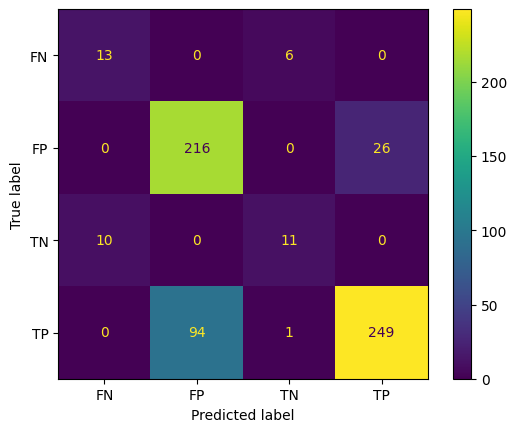

In [27]:
# Train / Test Split (70 / 30)
df = data_setup()
tokenize_text(df)
remove_stopwords(df)
nltk_WordNetLemmatizer(df)
join_text(df)
concatenate_prompt_and_response(df)

# Verify
print(df.columns)

# Train / Test Split
X = df["prompt_and_response"]
y = df["First_label"]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.30,
    random_state=42,
    stratify=y
)

# Using Experiment Function
def run_stratified_cv_experiment(model, X, y, n_splits=5):
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    all_preds = []
    all_true = []

    for train_idx, val_idx in skf.split(X, y):
        X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
        y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

        vectorizer = TfidfVectorizer(max_features=5000)
        X_tr_vec = vectorizer.fit_transform(X_tr)
        X_val_vec = vectorizer.transform(X_val)

        model.fit(X_tr_vec, y_tr)
        preds = model.predict(X_val_vec)

        all_preds.extend(preds)
        all_true.extend(y_val)

    print("Validation Classification Report")
    print(classification_report(all_true, all_preds))

# Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=16,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight="balanced",
    bootstrap=True,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

# Cross-Validation on 70%
run_stratified_cv_experiment(
    rf_model,
    X_train,
    y_train
)

# Final Training on 70% of the data
final_vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = final_vectorizer.fit_transform(X_train)
X_test_vec = final_vectorizer.transform(X_test)

rf_model.fit(X_train_vec, y_train)

# Final Test on 30% of the data
test_preds = rf_model.predict(X_test_vec)

print("Final Test Classification Report")
print(classification_report(y_test, test_preds))

ConfusionMatrixDisplay.from_predictions(y_test, test_preds)
plt.show()

#### Random Forest Final Results Analysis

- The model shows stable generalization with minimal performance degradation from validation to test.
- Overall accuracy of 0.78 indicates acceptable baseline effectiveness.
- FP recall is strong at 0.89, supporting the stated objective of catching FPs.
- FN recall remains moderate, indicating residual risk exposure.
- TP precision is high at 0.91, signaling reliable positive identification.
- TN performance is weak, reflecting class imbalance constraints.
- The confusion matrix confirms FP–TP confusion as the dominant error mode.
- From a governance perspective, the model is production-viable with targeted tuning.

* **Accuracy:** 0.78
* **Precision:** macro 0.69, weighted 0.80
* **Recall:** macro 0.71, weighted 0.78
* **F1-score:** macro 0.69, weighted 0.78

### Random Forest with GridSearch

In [ ]:
# Random Forest (Manual TF-IDF for GridSearch Only)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer # NOTE - KEEP THE IMPORTS HERE TEMPORARILY 

# TF-IDF for GridSearch ONLY (experiment() will re-vectorize)
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec  = vectorizer.transform(X_test)

# Random Forest + Parameter Grid
rf_model = RandomForestClassifier(
    class_weight="balanced",
    bootstrap=True,
    max_features="sqrt",
    random_state=42,
    n_jobs=-1
)

rf_param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [8, 12, 16],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

# GridSearch on TF-IDF vectors (numeric)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_macro2 = make_scorer(
    f1_score,
    average="macro",
    labels=[2],
    zero_division=0.0
)

scoring = {
    "accuracy": "accuracy",
    "recall": "recall_macro",
    "f1_macro2": f1_macro2,
}

rf_grid = GridSearchCV(
    estimator=rf_model,
    param_grid=rf_param_grid,
    scoring=scoring,
    return_train_score=True,
    refit="recall",
    cv=cv,
    n_jobs=-1,
)

rf_grid.fit(X_train_vec, y_train)

print("Best params:", rf_grid.best_params_)
print("Best estimator:", rf_grid.best_estimator_)

# Run experiment() on raw text (since it doesnt worked with the experiment functions)
metrics = ModelMetrics()

best_model = rf_grid.best_estimator_

val_result, train_result, class_report = experiment(
    best_model,
    X,   # raw text
    y,
    "RF_Best"
)

metrics.update_model_metrics(val_result, train_result, class_report)

# Export PNG
plot_full_experiment(
    labels=["RF_Best"],
    validation_metrics=metrics.validation_metrics,
    training_metrics=metrics.training_metrics,
    validation_report_metrics=metrics.validation_report_metrics,
    title="RandomForest_Results"
)

Best params: {'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best estimator: RandomForestClassifier(class_weight='balanced', max_depth=16, n_estimators=150,
                       n_jobs=-1, random_state=42)

### Random Forest (No GridSearch, Multiple Experiments)
Multiple Random Forest configurations with multiple x-axis points

In [ ]:
# Random Forest Multi-Experiment (No GridSearch)
from sklearn.ensemble import RandomForestClassifier # NOTE - KEEP THE IMPORTS HERE TEMPORARILY 

# Define your experiment sweep
n_estimators_list = [10, 50, 100, 150, 200]
max_depth_list    = [4, 8, 12, 16]

# Build full parameter combinations
param_list = []
for n in n_estimators_list:
    for d in max_depth_list:
        param_list.append({"n_estimators": n, "max_depth": d})

# Initialize metrics container
metrics = ModelMetrics()
labels = []

# Run each experiment (your experiment() handles TF-IDF)
for params in param_list:

    model = RandomForestClassifier(
        n_estimators=params["n_estimators"],
        max_depth=params["max_depth"],
        min_samples_split=2,
        min_samples_leaf=1,
        class_weight="balanced",
        bootstrap=True,
        max_features="sqrt",
        random_state=42,
        n_jobs=-1
    )

    label = f"n{params['n_estimators']}_d{params['max_depth']}"
    labels.append(label)

    val_result, train_result, class_report = experiment(
        model,
        X,      # raw text -> experiment() vectorizes
        y,
        label
    )

    metrics.update_model_metrics(val_result, train_result, class_report)

# Plot Multi-Experiment RF Results
plot_full_experiment(
    labels=labels,
    validation_metrics=metrics.validation_metrics,
    training_metrics=metrics.training_metrics,
    validation_report_metrics=metrics.validation_report_metrics,
    title="RandomForest_Multi_Experiment"
)

## SVC

### Default SVC

In [36]:
# Default SVC

svc_metrics = ModelMetrics()

svc_model = SVC(probability=True)

validation_metrics, training_metrics, validation_report = experiment(svc_model, X_train, y_train, 
                                                                       "Scikit-learn Base SVM Classifier: Prompt+Response")
print(f"Training Metrics: {training_metrics}\n")
print(f"Validation Metrics: {validation_metrics}\n")
print(f"Validation Report: {validation_report}")

Training Metrics: {'accuracy': 0.9065068493150685, 'precision': 0.9400274530444573, 'recall': 0.9146260617392684, 'f1': 0.9257139304094826, 'auc': 0.9877885776283571}

Validation Metrics: {'accuracy': 0.7732876712328768, 'precision': 0.8311994060955609, 'recall': 0.7677213439082188, 'f1': 0.7822685310069356, 'auc': 0.9372146112650555}

Validation Report: {'FN': {'precision': 0.8484848484848485, 'recall': 0.6222222222222222, 'f1-score': 0.717948717948718, 'support': 45.0}, 'FP': {'precision': 0.72875226039783, 'recall': 0.7145390070921985, 'f1-score': 0.7215756490599821, 'support': 564.0}, 'TN': {'precision': 0.8679245283018868, 'recall': 0.92, 'f1-score': 0.8932038834951457, 'support': 50.0}, 'TP': {'precision': 0.7941534713763703, 'recall': 0.8139825218476904, 'f1-score': 0.8039457459926017, 'support': 801.0}, 'accuracy': 0.7732876712328767, 'macro avg': {'precision': 0.8098287771402339, 'recall': 0.7676859377905279, 'f1-score': 0.7841684991241118, 'support': 1460.0}, 'weighted avg': 

### Experimenting with C parameter

In [ ]:
svc_metrics = ModelMetrics()

test_c = [0.001, 0.01, 0.1, 1, 10, 100, 200]

for c in test_c:
    clf = SVC(kernel='linear', C=c, probability=True)
    # print(f"Training SVC with c={c}")
    validation_result, training_result, validation_report = experiment(clf, X_train, y_train, "Scikit-learn Base SVM Classifier: Prompt+Response")
    svc_metrics.update_model_metrics(validation_result, training_result, validation_report)

plot_full_experiment(test_c, svc_metrics.validation_metrics, svc_metrics.training_metrics, svc_metrics.validation_report_metrics, title="SVC C Param Experiment")

### SVC Hyperparameter Tuning (with TF-IDF)

In [ ]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', SVC(probability=True))
])


param_grid = {
    'tfidf__ngram_range': [(1, 1), (1, 2)], 
    'tfidf__min_df': [1, 3], 
    'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'clf__C': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 5, 7, 10, 50, 100, 150, 200], 
    'clf__class_weight': [None, 'balanced', {'TP': 1, 'FP': 7, 'TN': 10, 'FN': 10}, {'TP': 1, 'FP': 7, 'TN': 8, 'FN': 8}]
}

grid = grid_search_experiment(pipeline, param_grid)
results = grid.cv_results_

best_score = grid.best_score_
best_params = grid.best_params_
print(f"Pipeline: {pipeline}\n")
print(f"Param Grid: {param_grid}\n")
print(f"Best Score: {best_score}\n")
print(f"Best Parameters: {best_params}")

final_test(grid.best_estimator_, "Final SVC after Grid Search")

### SVC Hyperparameter Tuning (with word2vec)

In [74]:
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('word2vec', Word2Vec_Transformer(1, 1, 1, 1)),
    ('scaler', StandardScaler()),
    ('clf', SVC())
])


param_grid = {
    'word2vec__vector_size': [100, 75, 50, 25],
    'word2vec__window': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    'word2vec__min_count': [1],
    'word2vec__sg': [1],
    'clf__C': [100, 150, 200],
    # 0.001, 0.01, 0.05 ~ 0.25
    # 0.1, 0.2, 0.3 ~ 0.5882850890452371
    # 0.4, 0.5, 0.6 ~ 0.5983885285549386
    # 0.7, 0.8, 0.9 ~ 0.6127895058080947
    # 1, 2, 5 ~ 0.6827752813963857
    # 7, 10, 50 ~ 0.7902524971448115
    # 100, 150, 200 ~ 0.81129041923939
}

grid = grid_search_experiment(pipeline, param_grid)
results = grid.cv_results_

In [ ]:
pipeline = Pipeline([
    ('word2vec', Word2Vec_Transformer(1, 1, 1, 1)),
    ('clf', SVC())
])

# Class Sizes: 
# TP    1145
# FP     806
# TN      71
# FN      64

custom_class_weights1 = {'TP': 1, 'FP': 7, 'TN': 10, 'FN': 10}
custom_class_weights2 = {'TP': 2, 'FP': 8, 'TN': 10, 'FN': 10}
custom_class_weights3 = {'TP': 1, 'FP': 7, 'TN': 8, 'FN': 8}

param_grid = {
    'word2vec__vector_size': [5],
    'word2vec__window': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'word2vec__min_count': [1, 3],
    'word2vec__sg': [0, 1],
    'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'clf__C': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 5, 7, 10, 50, 100, 150, 200],
    'clf__class_weight': [None, 'balanced', custom_class_weights1, custom_class_weights2, custom_class_weights3]
}

grid = grid_search_experiment(pipeline, param_grid)
results = grid.cv_results_

In [75]:
best_score = grid.best_score_
best_params = grid.best_params_
print(f"Pipeline: {pipeline}\n")
print(f"Param Grid: {param_grid}\n")
print(f"Best Score: {best_score}\n")
print(f"Best Parameters: {best_params}")

Pipeline: Pipeline(steps=[('word2vec',
                 Word2Vec_Transformer(min_count=1, sg=1, vector_size=1,
                                      window=1)),
                ('scaler', StandardScaler()), ('clf', SVC())])

Param Grid: {'word2vec__vector_size': [100, 75, 50, 25], 'word2vec__window': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], 'word2vec__min_count': [1], 'word2vec__sg': [1], 'clf__C': [100, 150, 200]}

Best Score: 0.8371185269670264

Best Parameters: {'clf__C': 150, 'word2vec__min_count': 1, 'word2vec__sg': 1, 'word2vec__vector_size': 50, 'word2vec__window': 10}


## Gradient Boosted Decision Tree (GBDT)

In [ ]:
# imports

import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, recall_score, f1_score, balanced_accuracy_score

In [ ]:
# Pipeline
df = raw_df
df = data_setup_gbdt()
df = tokenize_text(df)
df = remove_stopwords(df, "nltk")
df = nltk_WordNetLemmatizer(df)
df = join_text(df)
df = concatenate_prompt_and_response(df)

df

In [ ]:
# Split the data 70 - 30. 

from sklearn.model_selection import train_test_split

X = df['prompt_and_response']
y = df['label_num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

print(type(X))
print(type(y))

In [ ]:
# GBDT model

def compute_metrics(y_true, y_pred, y_proba):
    return dict(
            accuracy = accuracy_score(y_true, y_pred),
            precision = precision_score(y_true, y_pred, average="weighted", zero_division=0),
            recall = recall_score(y_true, y_pred, average="weighted"),
            f1 = f1_score(y_true, y_pred, average="weighted"),
            auc = roc_auc_score(y_true, y_proba, multi_class="ovr", average="macro")
    )

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)
model = HistGradientBoostingClassifier(random_state=42, early_stopping=True)

pipeline = Pipeline([
    ('vectorizer', vectorizer),
    ('to_dense', to_dense),
    ('model', model)
])

# Parameter grid for grid-search
param_grid = {
    'vectorizer__max_features': [3000, 5000],
    'model__learning_rate': [0.05, 0.1],
    'model__max_depth': [3, 5],
    'model__min_samples_leaf': [10, 20],
    'model__l2_regularization': [0.0, 0.1],
    'model__max_iter': [100, 200],
}

# Scoring, optimized for FP class (label = 1)
def recall_fp_only(y_true, y_pred):
    recalls = recall_score(y_true, y_pred, average=None, zero_division=0)
    return recalls[1]

def f1_fp_only(y_true, y_pred):
    f1s = f1_score(y_true, y_pred, average=None, zero_division=0)
    return f1s[1]
recall_fp = make_scorer(recall_fp_only)
f1_fp = make_scorer(f1_fp_only)
balanced_acc = make_scorer(balanced_accuracy_score) # secondary metric
scoring = {
    'recall_fp': recall_fp, # most important (to catch harmful FP cases)
    'f1_fp': f1_fp, # balance precision/recall
    'balanced_acc': balanced_acc # backup global metric
}

# Grid search
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=skf,
    scoring=scoring,
    refit='recall_fp',
    return_train_score=True,
    n_jobs=-1,
    verbose=1,
)
grid_search.fit(X_train, y_train)

print("\n=== Best Parameters ===")
for k, v in grid_search.best_params_.items():
    print(f"{k}: {v}")

best_model = grid_search.best_estimator_

# Training Metrics
y_pred_train = best_model.predict(X_train)
y_proba_train = best_model.predict_proba(X_train)
train_metrics = compute_metrics(y_train, y_pred_train, y_proba_train)
print("\n=== Training Metrics ===")
for k, v in train_metrics.items():
    print(f"{k.capitalize()}: {v:.4f}")

# Validation Metrics (Mean validation metrics for each param combo)
cv_results = pd.DataFrame(grid_search.cv_results_)
metric_cols = [
    col for col in cv_results.columns 
    if col.startswith("mean_test_") or
       (col.startswith("split") and "test_" in col)
]
val_summary = cv_results[["params"] + metric_cols]
print("\n=== Cross-Validation Metrics (All Folds) ===")
print(val_summary.head())

# Test Metrics
y_pred_test = best_model.predict(X_test)
y_proba_test = best_model.predict_proba(X_test)
test_metrics = compute_metrics(y_test, y_pred_test, y_proba_test)
print("\n=== Test Set Metrics ===")
for k, v in test_metrics.items():
    print(f"{k.capitalize()}: {v:.4f}")

In [ ]:
# Saving results

try:
    results_df
except NameError:
    results_df = pd.DataFrame(columns=[
        "experiment_name",
        "lemmatization",
        "stemming",
        "ngrams",
        "embedding",
        "recall_FP",
        "accuracy",
        "precision",
        "F1",
        "AUC",
        "notes"
    ])

new_result = {
    "experiment_name": "baseline without the response column",
    "lemmatization": True,
    "stemming": False,
    "ngrams": "(1,2)",
    "embedding": "TF-IDF",
    "recall_FP": test_metrics["recall"],
    "accuracy": test_metrics["accuracy"],
    "precision": test_metrics["precision"],
    "F1": test_metrics["f1"],
    "AUC": test_metrics["auc"],
    "notes": "Baseline lemmatizer with ngrams (1,2), but using only prompt"
}

results_df = pd.concat([results_df, pd.DataFrame([new_result])], ignore_index=True)

results_df.to_csv("experiment_log.csv", index=False)

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
cm_df = pd.DataFrame(
    cm,
    index=["True_TP", "True_FP", "True_TN", "True_FN"],
    columns=["Pred_TP", "Pred_FP", "Pred_TN", "Pred_FN"]
)
print(cm_df)

In [ ]:
# Confusion Matrix pt 2
final_test(best_model, "Final GBDT after Grid Search")

In [ ]:
# Plotting metrics

def plot_all_metrics(train_metrics, test_metrics):
    avg_train_metrics = {
        'Accuracy': np.mean(train_metrics['accuracy']),
        'Precision': np.mean(train_metrics['precision']),
        'Recall': np.mean(train_metrics['recall']),
        'F1 Score': np.mean(train_metrics['f1']),
        'AUC': np.mean(train_metrics['auc'])
    }
    avg_test_metrics = {
        'Accuracy': test_metrics['accuracy'],
        'Precision': test_metrics['precision'],
        'Recall': test_metrics['recall'],
        'F1 Score': test_metrics['f1'],
        'AUC': test_metrics['auc']
    }

    df_plot = pd.DataFrame({
        'Training': avg_train_metrics,
        'Test': avg_test_metrics
    })
    df_plot = df_plot.loc[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']]
    plt.figure(figsize=(10, 6))
    df_plot.plot(kind='bar', figsize=(10, 6), rot=0)
    
    plt.title("Training vs Test Metrics")
    plt.ylabel("Score")
    plt.ylim(0, 1.0)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title="Dataset", loc="lower right")

    for container in plt.gca().containers:
        plt.bar_label(container, fmt="%.3f", label_type="edge", padding=2)
    
    plt.tight_layout()
    plt.show()

In [ ]:
plot_all_metrics(train_metrics, test_metrics)

results from preprocessing tuning:
- top performers (0.8083 recall): baseline, ngrams (1,1), snowball stemming, porter stemming 
- worse performers (0.71-0.73 recall): ngrams (2,2), only prompt column

conclusion: since most variants did not improve performance over the baseline (they just matched it), we will stick with the baseline setup. 